In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [6]:
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [7]:
#данные
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [8]:
#Оценка
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1122.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           5.26e-43
Time:                        20:37:21   Log-Likelihood:                 5.6239
No. Observations:                  50   AIC:                            -3.248
Df Residuals:                      46   BIC:                             4.400
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9827      0.077     64.848      0.0

In [9]:
#Предсказание в выборке
ypred = olsres.predict(X)

In [10]:
ypred

array([ 4.49576622,  4.95815264,  5.3839226 ,  5.74789962,  6.03399329,
        6.23784285,  6.3675337 ,  6.44226892,  6.48921432,  6.53903516,
        6.6208579 ,  6.75748487,  6.96164784,  7.23391628,  7.56260376,
        7.92568804,  8.29442922,  8.63809164,  8.92899367,  9.14705571,
        9.28309923,  9.34035475,  9.3339311 ,  9.28833306,  9.23343533,
        9.19957414,  9.21256315,  9.28945233,  9.43572666,  9.64440501,
        9.8971871 , 10.16746017, 10.4246714 , 10.63934766, 10.78793783,
       10.85668221, 10.84387321, 10.76013584, 10.62668214, 10.47182602,
       10.32633142, 10.21835787, 10.16883393, 10.18801871, 10.27381636,
       10.41212033, 10.57913111, 10.74526639, 10.88002137, 10.95698058])

In [11]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.94705727 10.81464875 10.57787138 10.27801007  9.9694103   9.70617243
  9.52890606  9.45478738  9.47335383  9.54906573]


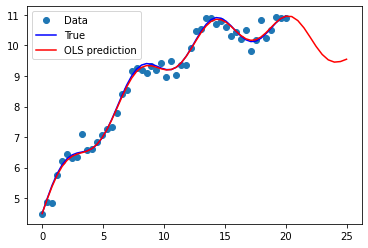

In [14]:
fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

In [16]:
#предсказание с формалами
data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

In [17]:
res.params

Intercept           4.982745
x1                  0.496765
np.sin(x1)          0.461961
I((x1 - 5) ** 2)   -0.019479
dtype: float64

In [18]:
res.predict(exog=dict(x1=x1n))

0    10.947057
1    10.814649
2    10.577871
3    10.278010
4     9.969410
5     9.706172
6     9.528906
7     9.454787
8     9.473354
9     9.549066
dtype: float64